# Tests Run with 128MB and 256 block length and distributed parity = True
# Run in WSL on a Intel i5-2500K CPU @ 3.30GHz

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Open the files and get the data
fileNames = ["3Frag.txt" , "4Frag.txt" , "5Frag.txt" , "6Frag.txt" , "7Frag.txt" , "8Frag.txt" , "9Frag.txt" , "10Frag.txt"]
averages = []

# data format: [encrypt, fragment, defragment, decrypt]

for file in fileNames:
    with open(file, "r") as f:
        data = f.read()
        data = data.split("\n")
        data = data[:-1]

        # parse numbers from data
        for i in range(len(data)):
            data[i] = data[i].split(", ")
            data[i] = [int(x) for x in data[i]]

    # calculate averages by column
    averages.append([])
    for i in range(len(data[0])):
        averages[-1].append(sum([x[i] for x in data]) / len(data))


print(averages)

[[1685.3, 6343.54, 1030.56, 2039.74], [1591.34, 5253.88, 1125.74, 1913.18], [1617.46, 5259.7, 1298.98, 1909.02], [1710.58, 5376.76, 1509.2, 1964.8], [1644.2, 5274.36, 1697.52, 1967.22], [1693.4, 5127.34, 1984.24, 1957.16], [1705.68, 5110.02, 2171.66, 1954.18], [1656.72, 5011.02, 2246.34, 1948.16]]


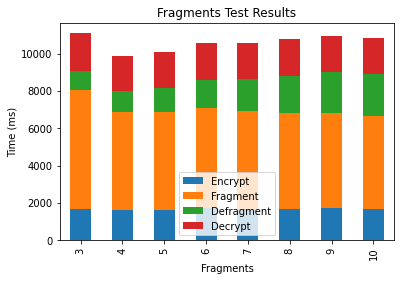

In [3]:
df = pd.DataFrame(averages)
df.columns = ["Encrypt", "Fragment", "Defragment", "Decrypt"]
df.index = ["3", "4", "5", "6", "7", "8", "9", "10"]
# crete a stacked bar chart

df.plot.bar(stacked=True)

plt.xlabel("Fragments")
plt.ylabel("Time (ms)")
plt.title("Fragments Test Results")
plt.show()
